<function matplotlib.pyplot.show(close=None, block=None)>

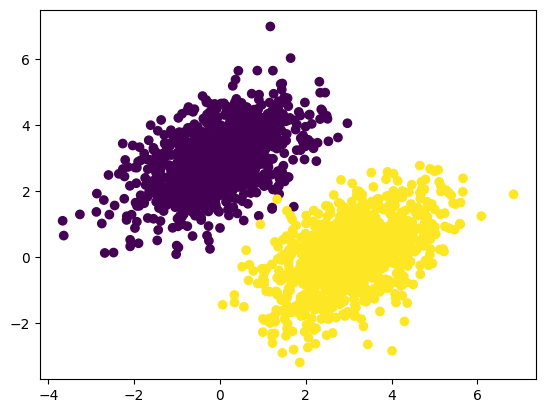

In [1]:
import tensorflow as tf
import numpy as np

#generating two classes of random pointss in a 2D plane
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0,3],
                                                cov=[[1, 0.5],[0.5, 1]],
                                                size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3, 0],
                                                cov=[[1, 0.5],[0.5, 1]],
                                                size=num_samples_per_class)

#stacking the two classes into an array with sahpe (2000,2)
inputs = np.vstack((negative_samples,positive_samples)).astype(np.float32)

#generating the corrsponding targets (0 and 1)
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), 
                    np.ones((num_samples_per_class, 1), dtype="float32")))

#plotting the two classes
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:,0])
plt.show

In [8]:
#creating the linear classifier variables
input_dim = 2
output_dim = 1
w = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

#the forwad pass function
def model(inputs):
    return tf.matmul(inputs, w) + b #prediction = w.inputs + b

#the mean squared error loss function
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses) #reduce_mean reduces the average of per_sample_losses to a single scalar loss value

#the training step function
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_w, grad_loss_wrt_b = tape.gradient(loss, [w, b])
    w.assign_sub(grad_loss_wrt_w * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

for step in range(40):
    loss = training_step(inputs, targets)
    print(f"loss at step {step}: {loss:.4f}")

loss at step 0: 5.2883
loss at step 1: 0.6058
loss at step 2: 0.1995
loss at step 3: 0.1429
loss at step 4: 0.1277
loss at step 5: 0.1180
loss at step 6: 0.1097
loss at step 7: 0.1021
loss at step 8: 0.0952
loss at step 9: 0.0890
loss at step 10: 0.0832
loss at step 11: 0.0780
loss at step 12: 0.0733
loss at step 13: 0.0689
loss at step 14: 0.0650
loss at step 15: 0.0614
loss at step 16: 0.0581
loss at step 17: 0.0551
loss at step 18: 0.0523
loss at step 19: 0.0498
loss at step 20: 0.0475
loss at step 21: 0.0455
loss at step 22: 0.0436
loss at step 23: 0.0418
loss at step 24: 0.0403
loss at step 25: 0.0388
loss at step 26: 0.0375
loss at step 27: 0.0363
loss at step 28: 0.0352
loss at step 29: 0.0342
loss at step 30: 0.0333
loss at step 31: 0.0325
loss at step 32: 0.0317
loss at step 33: 0.0310
loss at step 34: 0.0304
loss at step 35: 0.0298
loss at step 36: 0.0293
loss at step 37: 0.0288
loss at step 38: 0.0284
loss at step 39: 0.0280


<function matplotlib.pyplot.show(close=None, block=None)>

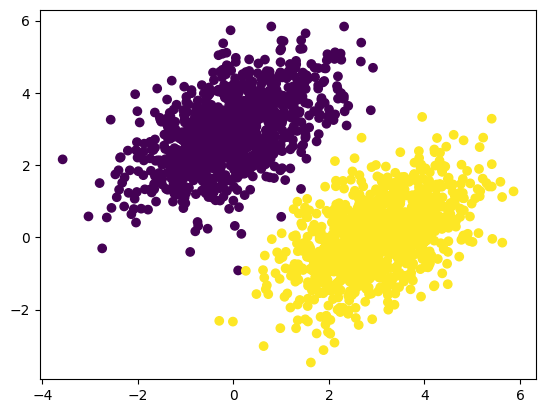

In [9]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0]>0.5)
plt.show

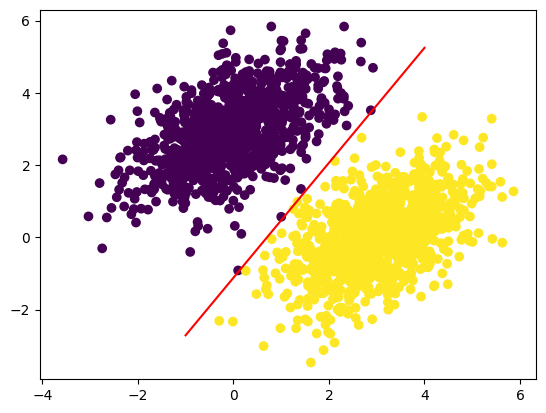

In [13]:
x = np.linspace(-1, 4, 100)
y = -w[0] / w[1] * x + (0.5 - b) / w[1]
plt.plot(x,y, '-r')
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)